In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [23]:
course_df = pd.read_csv('../data/course.csv')
ratings_df = pd.read_csv('../data/ratings.csv')


In [3]:
course_df.head(3)

,Unnamed: 0,COURSE_ID,TITLE,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,0,ML0201EN,robots are coming build iot apps with watson ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,1,ML0122EN,accelerating deep learning with gpu,0,1,0,0,0,1,0,1,0,0,0,0,0,0
2,2,GPXX0ZG0EN,consuming restful services using the reactive ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0


# WordCloud

In [4]:
titles = " ".join(title for title in course_df['TITLE'].astype(str))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="green", 
                      width=800, 
                      height=400)
wordcloud.generate(titles)


In [5]:
wordcloud.words_

{'using': 1.0,
 'data science': 0.75,
 'python': 0.675,
 'introduction': 0.675,
 'data': 0.625,
 'machine learning': 0.5,
 'data analysis': 0.475,
 'java microservice': 0.425,
 'application': 0.4,
 'big data': 0.375,
 'basic': 0.35,
 'service': 0.325,
 'cloud': 0.3,
 'web': 0.3,
 'fundamentals': 0.3,
 'build': 0.275,
 'spark': 0.275,
 'microservice': 0.275,
 'deep learning': 0.275,
 'kubernetes': 0.25,
 'database': 0.225,
 'container': 0.225,
 'essentials': 0.225,
 'ai': 0.225,
 'sql': 0.225,
 'getting started': 0.225,
 'restful java': 0.225,
 'reactive': 0.2,
 'testing': 0.2,
 'analysis': 0.2,
 'building': 0.2,
 'system': 0.2,
 'programming': 0.2,
 'ibm cloud': 0.2,
 'cloud computing': 0.2,
 'consuming': 0.175,
 'microprofile': 0.175,
 'tensorflow': 0.175,
 'eclipse microprofile': 0.175,
 'watson': 0.15,
 'apache': 0.15,
 'hadoop': 0.15,
 'javascript': 0.15,
 'model': 0.15,
 'using eclipse': 0.15,
 'reactive architecture': 0.15,
 'docker': 0.125,
 'create': 0.125,
 'analytics': 0.125,

In [6]:
import streamlit as st 
import streamlit_wordcloud as wordcloud
words = [
    dict(text="Robinhood", value=16000, color="#b5de2b", country="US", industry="Cryptocurrency"),
    dict(text="Personio", value=8500, color="#b5de2b", country="DE", industry="Human Resources"),
    dict(text="Boohoo", value=6700, color="#b5de2b", country="UK", industry="Beauty"),
    dict(text="Deliveroo", value=13400, color="#b5de2b", country="UK", industry="Delivery"),
    dict(text="SumUp", value=8300, color="#b5de2b", country="UK", industry="Credit Cards"),
    dict(text="CureVac", value=12400, color="#b5de2b", country="DE", industry="BioPharma"),
    dict(text="Deezer", value=10300, color="#b5de2b", country="FR", industry="Music Streaming"),
    dict(text="Eurazeo", value=31, color="#b5de2b", country="FR", industry="Asset Management"),
    dict(text="Drift", value=6000, color="#b5de2b", country="US", industry="Marketing Automation"),
    dict(text="Twitch", value=4500, color="#b5de2b", country="US", industry="Social Media"),
    dict(text="Plaid", value=5600, color="#b5de2b", country="US", industry="FinTech"),
]
return_obj = wordcloud.visualize(words, tooltip_data_fields={
    'text':'Company', 'value':'Mentions', 'country':'Country of Origin', 'industry':'Industry'
}, per_word_coloring=False)

ModuleNotFoundError: No module named 'streamlit'

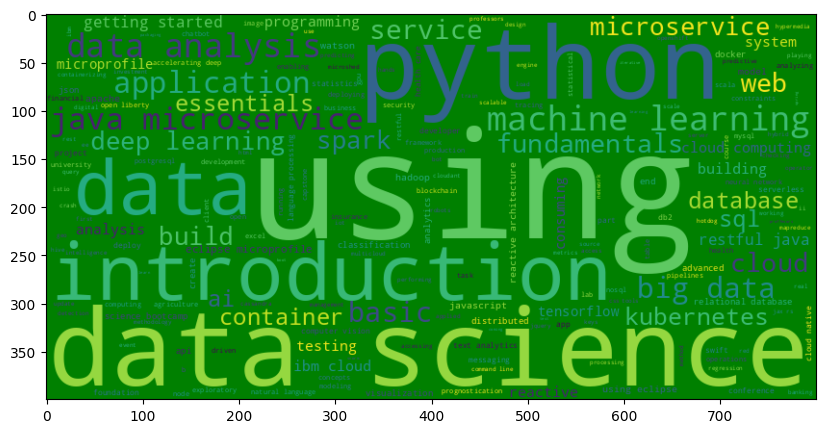

In [42]:
# Disable axis display
# Create a new figure with a specified size
plt.figure(figsize=(10,5))
# Adjust the layout to ensure tight spacing
plt.tight_layout(pad=0)
# Display the word cloud image with bilinear interpolation
plt.imshow(wordcloud, interpolation='bilinear')
# Show the plot
plt.show()

# Analyze Course Genres

In [22]:
dummy = course_df[course_df.columns[3:]].sum(axis=0).sort_values(ascending=False)
dummy = pd.DataFrame({'gender': dummy.index, 'count':dummy.values})
fig = px.bar(dummy, x='gender', y='count')
fig.show()

# Analyze Course Enrollments

In [147]:
column_group = 'user'
column_hist = 'enroll' # enroll count or rating mean
dummy = ratings_df.groupby(by=[column_group]).agg({'rating':'mean'}).join( ratings_df.groupby(by=[column_group]).size().to_frame(name='enroll'), on=column_group )[column_hist]
px.histogram(dummy,
             x=column_hist,
             marginal="box",
             #nbins=int((dummy.max()-dummy.min())/int(np.log2(dummy.shape[0]+1)))
             )

# Find the Top-20 Most Popular Courses

In [146]:
column_group = 'item'
column_hist = 'enroll'
dummy = ratings_df.groupby(by=['item']).size().sort_values(ascending=False).to_frame().reset_index().rename(columns={'item':'COURSE_ID',0:'Enroll'})
pd.merge(
    left = dummy,
    right = course_df[['COURSE_ID','TITLE']],
    on = 'COURSE_ID', 
    how='left'
    ).head(20)

,COURSE_ID,Enroll,TITLE
0,PY0101EN,14936,python for data science
1,DS0101EN,14477,introduction to data science
2,BD0101EN,13291,big data 101
3,BD0111EN,10599,hadoop 101
4,DA0101EN,8303,data analysis with python
5,DS0103EN,7719,data science methodology
6,ML0101ENv3,7644,machine learning with python
7,BD0211EN,7551,spark fundamentals i
8,DS0105EN,7199,data science hands on with open source tools
9,BC0101EN,6719,blockchain essentials
